##### Question 1

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# read csv file into df 
data_q1 = read.csv("question1.csv")
names(data_q1)
dim(data_q1)

[1] "density" "rate"

[1] 80  2

##### a. Plot data and comment on the results

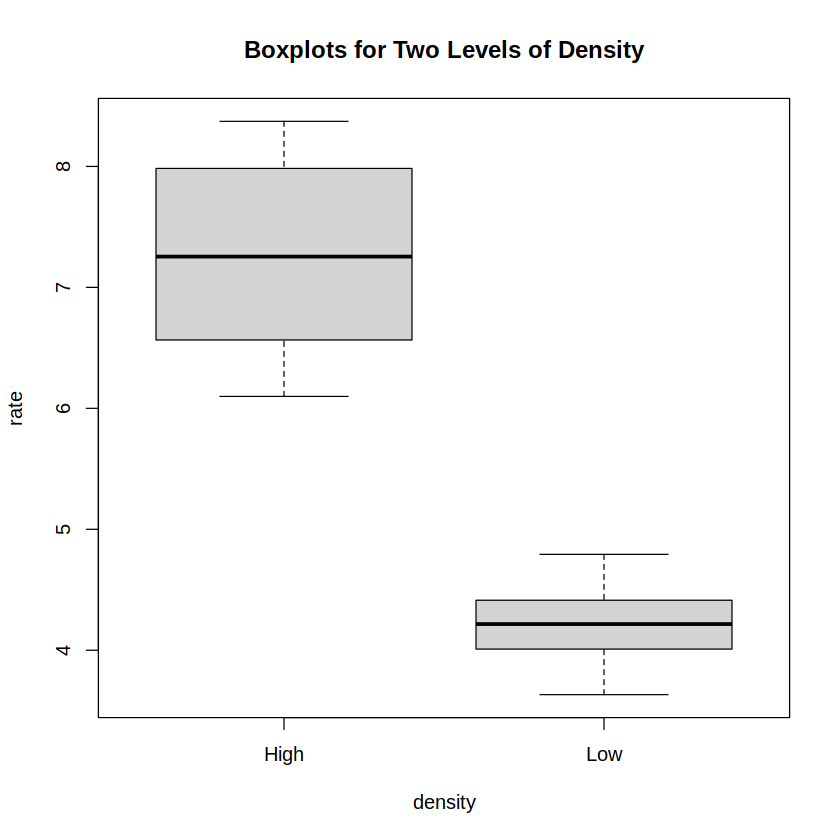

In [3]:
# use a boxplot
boxplot(rate~density, data=data_q1, main="Boxplots for Two Levels of Density")

Comments: Boxplots tells us about the spread of the data. Here, it tells about the spread of values in the two groups. We can say that, the variabilty in group "High" is higher than the variability in group "Low". Furthermore, values in the two groups does not have any overlap between them. The median absorbtion rate at high density is larger than the medain absorbtion rate at low density.

##### b. Create a model for this data

Model: $y_{ij} = \mu_{i} + \epsilon_{ij}$, 

where:
- $y_{ij}$ is the absorption rate for the ith level of density and the jth observation
- $\mu_{i}$ is the mean absorption rate of the ith level of density; i = {High, Low}
- $\epsilon_{ij}$ is the error term, assumed to be independent and normally distributed with mean zero and variance σ^2.

In [4]:
# use linear model
model_q1 = lm(rate~density, data=data_q1)
summary(model_q1)


Call:
lm(formula = rate ~ density, data = data_q1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12848 -0.42659  0.00254  0.37319  1.14582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.22718    0.09289   77.80   <2e-16 ***
densityLow  -3.01327    0.13137  -22.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5875 on 78 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8692 
F-statistic: 526.1 on 1 and 78 DF,  p-value: < 2.2e-16


In [5]:
# if assumptions need to be checked 
# plot(model_q1)

##### c. Power Analysis

- the number of	observations for each factor level combination is the same (a nicely balanced design)
- the mean at the low and high level of	the factor differ by 1 (effect size) ratio unit or more
- can be detected 80% of the time for each factor (or more) with significance level 0.05

In [6]:
library(pwr)

In [7]:
# using the effect size
p_2 = pwr.anova.test(k=2, f=1, power=0.80, sig.level=0.05)
p_2


     Balanced one-way analysis of variance power calculation 

              k = 2
              n = 5.089995
              f = 1
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


In [8]:
# using the variance between and within groups (experimental try)
groupmeans = c(mean(data_q1$rate[data_q1$density == 'Low']), mean(data_q1$rate[data_q1$density == 'High']))
p_1 = power.anova.test(groups=length(groupmeans), 
                    between.var=var(groupmeans), within.var=var(data_q1$rate),
                    power=0.80, sig.level=0.05, n=NULL)
p_1


     Balanced one-way analysis of variance power calculation 

         groups = 2
              n = 5.704176
    between.var = 4.539891
     within.var = 2.639488
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


Therefore, 6 observations are required for each factor level. Total: 6x2 = 12 for 2 levels.

#### Question 2

In [9]:
# read csv file into df 
data_q2 = read.csv("sleep.csv")
names(data_q2)
dim(data_q2)
# drop column X
data_q2 = data_q2[c(2,3)]
names(data_q2)
dim(data_q2)

[1] "X"       "ethanol" "time"

[1] 36  3

[1] "ethanol" "time"

[1] 36  2

##### a. Plot data and comment on the results

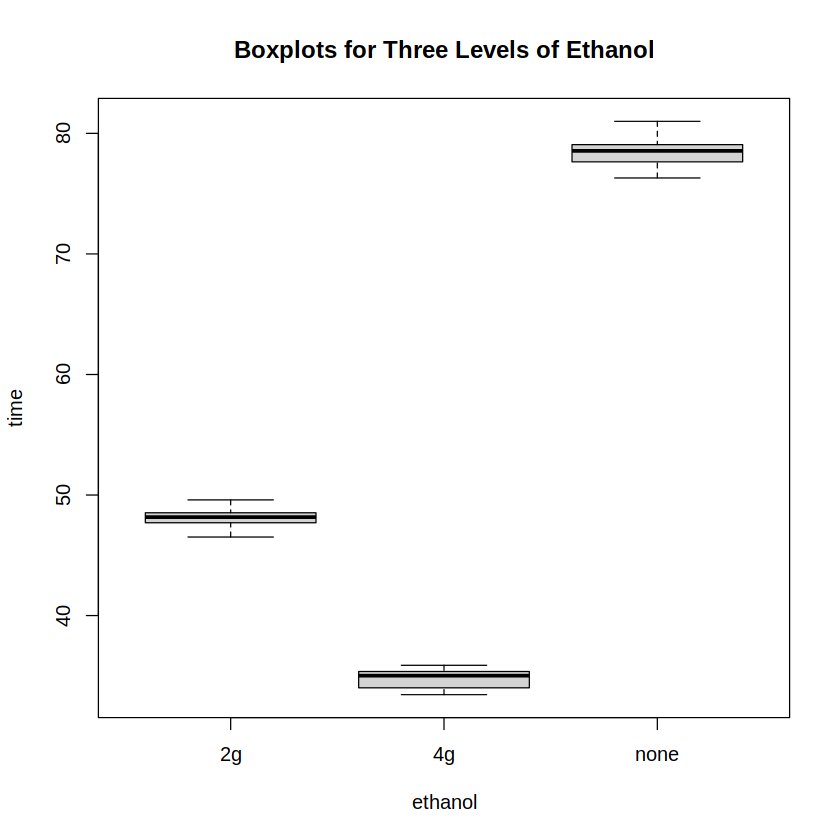

In [10]:
# use a boxplot
boxplot(time~ethanol, data=data_q2, main="Boxplots for Three Levels of Ethanol")

Comment: We can see that the median sleep time is longest for the rats that did not receive any ethanol, and shortest for the rats that received 4g of ethanol. In addition, the rats given 4g of ethanol appear to have more variability in their sleep times than the other two levels.

##### b. State the Null and Alternate hypotheses 

Null hypothesis: The level of ethanol does not have a significant effect on sleep time. Given by,
$H_0: \mu_{0g} = \mu_{2g} = \mu_{4g}$

Alternate hypothesis: The level of ethanol does have a significant effect on sleep time. Given by,
$H_1$ : Not all $\mu_{i}$ are equal, where $i \in \{0g, 2g, 4g\}$

##### c. Test the hypotheses

In [11]:
# use anova 
model_q2 = aov(time~ethanol, data=data_q2)
summary(model_q2)
# for normality, independence, and eq-variance check
#plot(model_q2)

            Df Sum Sq Mean Sq F value Pr(>F)    
ethanol      2  12048    6024    6501 <2e-16 ***
Residuals   33     31       1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<u>Test Statistic</u>

F-value: 6501

P-value: 0 < 0.05

Conclusion: The p-value is very small, which gives evidence against the null hypothesis at the 0.05 level of confidence. Thus, we can reject the null hypothesis and conclude that the level of ethanol does have a significant effect on sleep time.

##### d. Explain why rats died at higher doses of ethanol


If more rats died at a higher dose of ethanol, this would suggest that a higher level of ethanol is related to a higher mortality rate. This presents a few problems with the analysis and interpretation of the experiment. Firstly, the mortality rate influences sleep time (confounding effect). Suppose rats that received a higher level of ethanol often died. Then, it would be difficult to identify if the observed difference in sleep times were due to the higher level of ethanol or the fact that some rats died before the time measurements were taken. Secondly, there is a chance of ending up with an uneven sample size across different treatment groups. And lastly, it raises ethical concerns because a higher level of ethanol is deadly to rats.

Therefore, to ensure that the experiment produces reliable results and maintains ethical standards, we need to monitor the mortality rate of rats and adjust the level of ethanol given to them (to a lower amount).

##### e. Explain how would you modify the experiment to account for differences in the body mass of rats

To account for differences in body mass, we can use a randomized complete block design. For this, we will have to divide rats into groups or blocks based on their body mass. Then, within each block, we will randomly assign one out of the three treatments to rats, i.e., the level of ethanol: 0g, 2g, or 4g. This method will allow us to make a more precise estimation of the effect of ethanol on sleep time because it will account for the effect of differences in body mass for each block. Thus, the power of the experiment will increase due to accounting for individual differences in body mass, and as a result, the variability in the observed sleep time (response variable) will decrease.

#### Question 3

##### a. Explain what is the problem with critics report

Observational data does not reveal the cause-and-effect relationship between the clear cutting of trees and the decreased production of salmon. Other factors may be responsible for the observed difference, making it difficult to conclude that the decreased production of salmon is caused by clear cutting of trees alone.

##### b. Parameters

i. Factor of interest:  The harvesting method (clear cutting or selective harvesting)


ii. Factor levels: Clear cutting and selective harvesting; two levels


iii. Experimental unit: The locations where the harvesting takes place


iv. Observational unit: The streams within each harvesting location


v. Response variable: The total amount of salmon (kg/km) in each harvesting location

##### c. Design an new experiment

For a new experiment, we can use a randomized complete block design. We will divide the harvesting locations with two different types of soil into two groups or blocks. Since there are 12 locations, with 6 having silty soil and the other 6 having sandy soil, we will have two blocks, each containing 6 locations. Then, within each block, we will randomly assign locations to each of the harvesting methods, i.e., clear cutting or selective harvesting. After the harvesting is complete, we will measure the total amount of salmon (kg/km) in the 10 streams within each location. This method will ensure that the effect of the type of soil is considered when accounting for the differences in salmon production.

Note: This experimental design does not account for the effect that individual streams have on the production of salmon.

Experiment layout: Treatments (2 levels) are chosen randomly

| Location | Soil Type/Block | Treatment |
| --- | --- | --- |
| 1| Sandy | Clear |
| 2| Sandy | Selective | 
| 3| Sandy | Clear | 
| 4| Sandy  | Selective | 
| 5| Sandy  | Clear | 
| 6| Sandy  | Selective 
| 7| Silty | Clear | 
| 8| Silty | Selective |
| 9| Silty | Clear |
| 10| Silty | Selective | 
| 11| Silty | Clear |
| 12| Silty | Selective | 